In [1]:
import pandas as pd
import numpy as np
import pandas_ta as ta

In [8]:
#read data
df=pd.read_csv("/Users/luzhang/Desktop/data/SPY.csv")
df = pd.DataFrame(df)
df

,time,open,high,low,close,volume
0,2007-04-23 16:14:00,148.09,148.09,148.05,148.05,16000.0
1,2007-04-23 16:15:00,148.06,148.12,148.06,148.11,30400.0
2,2007-04-23 16:16:00,148.08,148.08,148.06,148.06,126300.0
3,2007-04-24 09:31:00,148.23,148.28,148.12,148.15,341400.0
4,2007-04-24 09:32:00,148.14,148.21,148.14,148.19,449100.0
...,...,...,...,...,...,...
2106977,2018-11-01 22:39:00,272.92,272.92,272.92,272.92,500.0
2106978,2018-11-01 22:55:00,273.07,273.07,273.02,273.02,150.0
2106979,2018-11-01 23:44:00,272.80,272.80,272.80,272.80,3600.0
2106980,2018-11-01 23:45:00,272.82,272.82,272.82,272.82,1.0


In [9]:
def DropOutlierday(data):
    # subset dataframe such that it only contains the complete transcation
    totalDay=pd.to_datetime(data.index.date).unique()
    completeDay=totalDay[day_keep]

    outlierday=totalDay.difference(completeDay)
    data['date'] = [d.date() for d in data.index]

    outlierday=outlierday.strftime('%Y-%m-%d')
    t=pd.DataFrame()
    
    for i in range(len(outlierday)):
        temp=pd.DataFrame(data['date'].loc[outlierday[i]])
        t=t.append(temp)
    
    data = data.drop(t.index) # drop the outlier day
    data = data.drop('date',1) # delete columne 'date'
    return data

### Retuns Calculation

In [10]:
# data pre-cessing
#change sereis to datetime format
df['time']=pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

In [11]:
#subset df to calculate LH, LH0 and ROD
df_LH_ROD = df[((df.index.hour == 15) & (df.index.minute == 30))|
        ((df.index.hour == 16) & (df.index.minute == 0))]
df_LH_ROD

,open,high,low,close,volume
time,,,,,
2007-04-24 15:30:00,148.1500,148.150,148.13,148.14,53600.0
2007-04-24 16:00:00,147.9900,148.040,147.98,148.04,303975.0
2007-04-25 15:30:00,149.4600,149.580,149.46,149.56,521400.0
2007-04-25 16:00:00,149.5600,149.570,149.46,149.46,692600.0
2007-04-26 15:30:00,149.6900,149.710,149.69,149.69,36400.0
...,...,...,...,...,...
2018-10-30 16:00:00,267.9900,267.990,267.67,267.81,3065407.0
2018-10-31 15:30:00,272.1259,272.455,272.08,272.42,512608.0
2018-10-31 16:00:00,270.8900,270.920,270.54,270.69,3801019.0


In [12]:
# find the complete transaction
rows_eachday = df_LH_ROD.groupby(df_LH_ROD.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2884

In [13]:
df_LH_ROD = DropOutlierday(df_LH_ROD)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/3023528149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/3023528149.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [14]:
df_LH_ROD

,open,high,low,close,volume
time,,,,,
2007-04-24 15:30:00,148.1500,148.150,148.13,148.14,53600.0
2007-04-24 16:00:00,147.9900,148.040,147.98,148.04,303975.0
2007-04-25 15:30:00,149.4600,149.580,149.46,149.56,521400.0
2007-04-25 16:00:00,149.5600,149.570,149.46,149.46,692600.0
2007-04-26 15:30:00,149.6900,149.710,149.69,149.69,36400.0
...,...,...,...,...,...
2018-10-30 16:00:00,267.9900,267.990,267.67,267.81,3065407.0
2018-10-31 15:30:00,272.1259,272.455,272.08,272.42,512608.0
2018-10-31 16:00:00,270.8900,270.920,270.54,270.69,3801019.0


In [15]:
df_LH_ROD['returns'] = df_LH_ROD['close'].pct_change();
df_LH_ROD

,open,high,low,close,volume,returns
time,,,,,,
2007-04-24 15:30:00,148.1500,148.150,148.13,148.14,53600.0,NaN
2007-04-24 16:00:00,147.9900,148.040,147.98,148.04,303975.0,-0.000675
2007-04-25 15:30:00,149.4600,149.580,149.46,149.56,521400.0,0.010267
2007-04-25 16:00:00,149.5600,149.570,149.46,149.46,692600.0,-0.000669
2007-04-26 15:30:00,149.6900,149.710,149.69,149.69,36400.0,0.001539
...,...,...,...,...,...,...
2018-10-30 16:00:00,267.9900,267.990,267.67,267.81,3065407.0,0.002639
2018-10-31 15:30:00,272.1259,272.455,272.08,272.42,512608.0,0.017214
2018-10-31 16:00:00,270.8900,270.920,270.54,270.69,3801019.0,-0.006350


In [16]:
df_LH=df_LH_ROD[((df_LH_ROD.index.hour == 16) & (df_LH_ROD.index.minute == 0))]
df_LH=df_LH.drop(['open','high','low','close','volume'],1)
df_LH = df_LH.rename(columns={"returns":"R_LH"})
df_LH

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/3991369880.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_LH=df_LH.drop(['open','high','low','close','volume'],1)


,R_LH
time,
2007-04-24 16:00:00,-0.000675
2007-04-25 16:00:00,-0.000669
2007-04-26 16:00:00,-0.002004
2007-04-27 16:00:00,-0.000134
2007-04-30 16:00:00,-0.003697
...,...
2018-10-26 16:00:00,0.000189
2018-10-29 16:00:00,0.004991
2018-10-30 16:00:00,0.002639


In [17]:
df_LH0=df_LH.shift()
df_LH0=df_LH0.rename(columns={'R_LH':'R_LH0'})
df_LH0

,R_LH0
time,
2007-04-24 16:00:00,NaN
2007-04-25 16:00:00,-0.000675
2007-04-26 16:00:00,-0.000669
2007-04-27 16:00:00,-0.002004
2007-04-30 16:00:00,-0.000134
...,...
2018-10-26 16:00:00,-0.004533
2018-10-29 16:00:00,0.000189
2018-10-30 16:00:00,0.004991


In [18]:
df_ROD=df_LH_ROD[((df_LH_ROD.index.hour == 15) & (df_LH_ROD.index.minute == 30))]
df_ROD=df_ROD.drop(['open','high','low','close','volume'],1)
df_ROD=df_ROD.rename(columns={'returns':'R_ROD'})
df_ROD

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/2940247541.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_ROD=df_ROD.drop(['open','high','low','close','volume'],1)


,R_ROD
time,
2007-04-24 15:30:00,NaN
2007-04-25 15:30:00,0.010267
2007-04-26 15:30:00,0.001539
2007-04-27 15:30:00,0.000201
2007-04-30 15:30:00,-0.004150
...,...
2018-10-26 15:30:00,-0.018139
2018-10-29 15:30:00,-0.010554
2018-10-30 15:30:00,0.012528


In [19]:
df_ON=df[((df.index.hour == 9) & (df.index.minute == 31))|
        ((df.index.hour == 16) & (df.index.minute == 0))]
# Larry: 9:31 is the data for the first minute which is better than using the data for 9:29~9:30
df_ON

,open,high,low,close,volume
time,,,,,
2007-04-24 09:31:00,148.230,148.28,148.1200,148.15,341400.0
2007-04-24 16:00:00,147.990,148.04,147.9800,148.04,303975.0
2007-04-25 09:31:00,148.730,148.75,148.6800,148.73,268100.0
2007-04-25 16:00:00,149.560,149.57,149.4600,149.46,692600.0
2007-04-26 09:31:00,149.490,149.54,149.4600,149.47,249000.0
...,...,...,...,...,...
2018-10-30 16:00:00,267.990,267.99,267.6700,267.81,3065407.0
2018-10-31 09:31:00,270.650,270.77,270.5050,270.55,847888.0
2018-10-31 16:00:00,270.890,270.92,270.5400,270.69,3801019.0


In [20]:
rows_eachday = df_ON.groupby(df_ON.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2898

In [21]:
df_ON = DropOutlierday(df_ON)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/3023528149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/3023528149.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [22]:
df_ON

,open,high,low,close,volume
time,,,,,
2007-04-24 09:31:00,148.230,148.28,148.1200,148.15,341400.0
2007-04-24 16:00:00,147.990,148.04,147.9800,148.04,303975.0
2007-04-25 09:31:00,148.730,148.75,148.6800,148.73,268100.0
2007-04-25 16:00:00,149.560,149.57,149.4600,149.46,692600.0
2007-04-26 09:31:00,149.490,149.54,149.4600,149.47,249000.0
...,...,...,...,...,...
2018-10-30 16:00:00,267.990,267.99,267.6700,267.81,3065407.0
2018-10-31 09:31:00,270.650,270.77,270.5050,270.55,847888.0
2018-10-31 16:00:00,270.890,270.92,270.5400,270.69,3801019.0


In [23]:
df_ON['close_pre'] = df_ON['close'].shift()

In [24]:
df_ON = df_ON[((df_ON.index.hour == 9) & (df_ON.index.minute == 31))]

In [25]:
df_ON

,open,high,low,close,volume,close_pre
time,,,,,,
2007-04-24 09:31:00,148.23,148.28,148.1200,148.1500,341400.0,NaN
2007-04-25 09:31:00,148.73,148.75,148.6800,148.7300,268100.0,148.04
2007-04-26 09:31:00,149.49,149.54,149.4600,149.4700,249000.0,149.46
2007-04-27 09:31:00,149.04,149.07,148.9700,148.9700,735350.0,149.39
2007-04-30 09:31:00,149.64,149.67,149.5300,149.5400,693300.0,149.40
...,...,...,...,...,...,...
2018-10-26 09:31:00,265.92,271.00,265.7200,266.0400,1269275.0,270.14
2018-10-29 09:31:00,268.78,269.08,268.7400,269.0000,1015527.0,265.29
2018-10-30 09:31:00,263.67,263.73,263.1200,263.2719,902360.0,263.80


In [26]:
df_ON['R_ON'] = df_ON['open']/df_ON['close_pre']-1;
df_ON = df_ON.drop(["open","high","low","close","volume","close_pre"],1)
df_ON

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/2589525367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ON['R_ON'] = df_ON['open']/df_ON['close_pre']-1;
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/2589525367.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_ON = df_ON.drop(["open","high","low","close","volume","close_pre"],1)


,R_ON
time,
2007-04-24 09:31:00,NaN
2007-04-25 09:31:00,0.004661
2007-04-26 09:31:00,0.000201
2007-04-27 09:31:00,-0.002343
2007-04-30 09:31:00,0.001606
...,...
2018-10-26 09:31:00,-0.015622
2018-10-29 09:31:00,0.013155
2018-10-30 09:31:00,-0.000493


In [27]:
df_FH = df[((df.index.hour == 9) & (df.index.minute == 31))|
        ((df.index.hour == 10) & (df.index.minute == 0))]
# Larry: use 9:31 data
df_FH

,open,high,low,close,volume
time,,,,,
2007-04-24 09:31:00,148.23,148.28,148.1200,148.15,341400.0
2007-04-24 10:00:00,147.90,148.04,147.8900,148.04,352596.0
2007-04-25 09:31:00,148.73,148.75,148.6800,148.73,268100.0
2007-04-25 10:00:00,148.55,148.61,148.5300,148.55,202178.0
2007-04-26 09:31:00,149.49,149.54,149.4600,149.47,249000.0
...,...,...,...,...,...
2018-10-30 10:00:00,266.90,266.96,266.6600,266.68,515725.0
2018-10-31 09:31:00,270.65,270.77,270.5050,270.55,847888.0
2018-10-31 10:00:00,271.56,271.61,271.4900,271.51,217911.0


In [28]:
rows_eachday = df_FH.groupby(df_FH.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2903

In [29]:
df_FH = DropOutlierday(df_FH)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/3023528149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/3023528149.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [30]:
df_FH['open_pre30']=df_FH['open'].shift()

In [31]:
df_FH=df_FH[(df_FH.index.hour==10)&(df_FH.index.minute==0)]
df_FH

,open,high,low,close,volume,open_pre30
time,,,,,,
2007-04-24 10:00:00,147.90,148.040,147.89,148.04,352596.0,148.23
2007-04-25 10:00:00,148.55,148.610,148.53,148.55,202178.0,148.73
2007-04-26 10:00:00,149.21,149.220,149.18,149.18,381200.0,149.49
2007-04-27 10:00:00,149.06,149.110,149.05,149.11,263200.0,149.04
2007-04-30 10:00:00,149.31,149.360,149.30,149.34,123800.0,149.64
...,...,...,...,...,...,...
2018-10-26 10:00:00,265.94,265.940,265.69,265.81,281616.0,265.92
2018-10-29 10:00:00,268.99,269.098,268.90,269.02,156557.0,268.78
2018-10-30 10:00:00,266.90,266.960,266.66,266.68,515725.0,263.67


In [32]:
df_FH['R_FH'] = df_FH['open']/df_FH['open_pre30']-1
df_FH = df_FH.drop(["open","high","low","close","open_pre30",'volume'],1)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/1210239203.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_FH = df_FH.drop(["open","high","low","close","open_pre30",'volume'],1)


In [33]:
df_FH

,R_FH
time,
2007-04-24 10:00:00,-0.002226
2007-04-25 10:00:00,-0.001210
2007-04-26 10:00:00,-0.001873
2007-04-27 10:00:00,0.000134
2007-04-30 10:00:00,-0.002205
...,...
2018-10-26 10:00:00,0.000075
2018-10-29 10:00:00,0.000781
2018-10-30 10:00:00,0.012250


In [34]:
df_ONFH = df[((df.index.hour==16)&(df.index.minute==0))|
            ((df.index.hour==10)&(df.index.minute==0))]
df_ONFH

,open,high,low,close,volume
time,,,,,
2007-04-24 10:00:00,147.900,148.04,147.89,148.04,352596.0
2007-04-24 16:00:00,147.990,148.04,147.98,148.04,303975.0
2007-04-25 10:00:00,148.550,148.61,148.53,148.55,202178.0
2007-04-25 16:00:00,149.560,149.57,149.46,149.46,692600.0
2007-04-26 10:00:00,149.210,149.22,149.18,149.18,381200.0
...,...,...,...,...,...
2018-10-30 16:00:00,267.990,267.99,267.67,267.81,3065407.0
2018-10-31 10:00:00,271.560,271.61,271.49,271.51,217911.0
2018-10-31 16:00:00,270.890,270.92,270.54,270.69,3801019.0


In [35]:
rows_eachday = df_ONFH.groupby(df_ONFH.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2897

In [36]:
df_ONFH = DropOutlierday(df_ONFH)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/3023528149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/3023528149.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [37]:
df_ONFH

,open,high,low,close,volume
time,,,,,
2007-04-24 10:00:00,147.900,148.04,147.89,148.04,352596.0
2007-04-24 16:00:00,147.990,148.04,147.98,148.04,303975.0
2007-04-25 10:00:00,148.550,148.61,148.53,148.55,202178.0
2007-04-25 16:00:00,149.560,149.57,149.46,149.46,692600.0
2007-04-26 10:00:00,149.210,149.22,149.18,149.18,381200.0
...,...,...,...,...,...
2018-10-30 16:00:00,267.990,267.99,267.67,267.81,3065407.0
2018-10-31 10:00:00,271.560,271.61,271.49,271.51,217911.0
2018-10-31 16:00:00,270.890,270.92,270.54,270.69,3801019.0


In [38]:
df_ONFH['close_preday']=df_ONFH['close'].shift()

In [39]:
df_ONFH=df_ONFH[((df_ONFH.index.hour==10)&(df_ONFH.index.minute==0))]

In [40]:
df_ONFH['R_ONFH']=df_ONFH['open']/df_ONFH['close_preday']-1

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/1058864201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ONFH['R_ONFH']=df_ONFH['open']/df_ONFH['close_preday']-1


In [41]:
df_ONFH = df_ONFH.drop(['open','high','low','close','volume','close_preday'],1)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/2488401400.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_ONFH = df_ONFH.drop(['open','high','low','close','volume','close_preday'],1)


In [42]:
df_ONFH

,R_ONFH
time,
2007-04-24 10:00:00,NaN
2007-04-25 10:00:00,0.003445
2007-04-26 10:00:00,-0.001673
2007-04-27 10:00:00,-0.002209
2007-04-30 10:00:00,-0.000602
...,...
2018-10-26 10:00:00,-0.015547
2018-10-29 10:00:00,0.013947
2018-10-30 10:00:00,0.011751


In [43]:
df_M = df[((df.index.hour==10)&(df.index.minute==0)) |
         ((df.index.hour==15)&(df.index.minute==0))]
df_M

,open,high,low,close,volume
time,,,,,
2007-04-24 10:00:00,147.900,148.04,147.89,148.040,352596.0
2007-04-24 15:00:00,148.140,148.14,148.11,148.130,173400.0
2007-04-25 10:00:00,148.550,148.61,148.53,148.550,202178.0
2007-04-25 15:00:00,149.320,149.35,149.31,149.330,44200.0
2007-04-26 10:00:00,149.210,149.22,149.18,149.180,381200.0
...,...,...,...,...,...
2018-10-30 15:00:00,266.495,266.61,266.20,266.290,357737.0
2018-10-31 10:00:00,271.560,271.61,271.49,271.510,217911.0
2018-10-31 15:00:00,272.810,272.91,272.80,272.865,100276.0


In [44]:
rows_eachday = df_M.groupby(df_M.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2888

In [45]:
df_M = DropOutlierday(df_M)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/3023528149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/3023528149.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [46]:
df_M

,open,high,low,close,volume
time,,,,,
2007-04-24 10:00:00,147.900,148.04,147.89,148.040,352596.0
2007-04-24 15:00:00,148.140,148.14,148.11,148.130,173400.0
2007-04-25 10:00:00,148.550,148.61,148.53,148.550,202178.0
2007-04-25 15:00:00,149.320,149.35,149.31,149.330,44200.0
2007-04-26 10:00:00,149.210,149.22,149.18,149.180,381200.0
...,...,...,...,...,...
2018-10-30 15:00:00,266.495,266.61,266.20,266.290,357737.0
2018-10-31 10:00:00,271.560,271.61,271.49,271.510,217911.0
2018-10-31 15:00:00,272.810,272.91,272.80,272.865,100276.0


In [47]:
df_M['open_past30'] = df_M['open'].shift()

In [48]:
df_M = df_M[((df_M.index.hour==15)&(df_M.index.minute==0))]

In [49]:
df_M['R_M'] = df_M['close']/df_M['open_past30']-1

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/1719777920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M['R_M'] = df_M['close']/df_M['open_past30']-1


In [50]:
df_M = df_M.drop(['open','high','low','close','open_past30','volume'],1)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/2592150204.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_M = df_M.drop(['open','high','low','close','open_past30','volume'],1)


In [51]:
df_M

,R_M
time,
2007-04-24 15:00:00,0.001555
2007-04-25 15:00:00,0.005251
2007-04-26 15:00:00,0.002882
2007-04-27 15:00:00,0.003824
2007-04-30 15:00:00,-0.002210
...,...
2018-10-26 15:00:00,-0.005528
2018-10-29 15:00:00,-0.016543
2018-10-30 15:00:00,-0.002286


In [52]:
df_SLH = df[((df.index.hour==15)&(df.index.minute==30)) |
           ((df.index.hour==15)&(df.index.minute==0))]
df_SLH

,open,high,low,close,volume
time,,,,,
2007-04-24 15:00:00,148.1400,148.140,148.11,148.130,173400.0
2007-04-24 15:30:00,148.1500,148.150,148.13,148.140,53600.0
2007-04-25 15:00:00,149.3200,149.350,149.31,149.330,44200.0
2007-04-25 15:30:00,149.4600,149.580,149.46,149.560,521400.0
2007-04-26 15:00:00,149.6600,149.660,149.63,149.640,310200.0
...,...,...,...,...,...
2018-10-30 15:30:00,267.2400,267.320,266.98,267.105,509692.0
2018-10-31 15:00:00,272.8100,272.910,272.80,272.865,100276.0
2018-10-31 15:30:00,272.1259,272.455,272.08,272.420,512608.0


In [53]:
rows_eachday = df_SLH.groupby(df_SLH.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2883

In [54]:
df_SLH = DropOutlierday(df_SLH)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/3023528149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/3023528149.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [55]:
df_SLH['close_pre60'] = df_SLH['close'].shift()

In [56]:
df_SLH = df_SLH[((df_SLH.index.hour==15)&(df_SLH.index.minute==30))]

In [57]:
df_SLH['R_SLH'] = df_SLH['close']/df_SLH['close_pre60']-1

In [58]:
df_SLH = df_SLH.drop(['open','high','low','close','volume','close_pre60'],1)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63886/269419993.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_SLH = df_SLH.drop(['open','high','low','close','volume','close_pre60'],1)


In [59]:
df_SLH

,R_SLH
time,
2007-04-24 15:30:00,0.000068
2007-04-25 15:30:00,0.001540
2007-04-26 15:30:00,0.000334
2007-04-27 15:30:00,-0.001403
2007-04-30 15:30:00,-0.001342
...,...
2018-10-26 15:30:00,0.002911
2018-10-29 15:30:00,-0.007749
2018-10-30 15:30:00,0.003061


In [60]:
# keep the date and ignore the time
df_LH['new_date'] = [d.date() for d in df_LH.index]
df_LH0['new_date'] = [d.date() for d in df_LH0.index]
df_ROD['new_date'] = [d.date() for d in df_ROD.index]
df_ON['new_date'] = [d.date() for d in df_ON.index]
df_FH['new_date'] = [d.date() for d in df_FH.index]
df_ONFH['new_date'] = [d.date() for d in df_ONFH.index]
df_M['new_date'] = [d.date() for d in df_M.index]
df_SLH['new_date'] = [d.date() for d in df_SLH.index]

In [61]:
# merge by same date
data_frames=[df_LH, df_LH0, df_ROD, df_ON, df_FH, df_ONFH, df_M, df_SLH]

In [62]:
from functools import reduce

In [63]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['new_date'],
                                            how='inner'), data_frames)

In [64]:
df_merged

,R_LH,new_date,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH
0,-0.000675,2007-04-24,NaN,NaN,NaN,-0.002226,NaN,0.001555,0.000068
1,-0.000669,2007-04-25,-0.000675,0.010267,0.004661,-0.001210,0.003445,0.005251,0.001540
2,-0.002004,2007-04-26,-0.000669,0.001539,0.000201,-0.001873,-0.001673,0.002882,0.000334
3,-0.000134,2007-04-27,-0.002004,0.000201,-0.002343,0.000134,-0.002209,0.003824,-0.001403
4,-0.003697,2007-04-30,-0.000134,-0.004150,0.001606,-0.002205,-0.000602,-0.002210,-0.001342
...,...,...,...,...,...,...,...,...,...
2877,0.000189,2018-10-26,-0.004533,-0.018139,-0.015622,0.000075,-0.015547,-0.005528,0.002911
2878,0.004991,2018-10-29,0.000189,-0.010554,0.013155,0.000781,0.013947,-0.016543,-0.007749
2879,0.002639,2018-10-30,0.004991,0.012528,-0.000493,0.012250,0.011751,-0.002286,0.003061
2880,-0.006350,2018-10-31,0.002639,0.017214,0.010605,0.003362,0.014002,0.004806,-0.001631


In [65]:
df_merged=df_merged.rename(columns={'new_date':'datetime'})

In [66]:
df_merged

,R_LH,datetime,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH
0,-0.000675,2007-04-24,NaN,NaN,NaN,-0.002226,NaN,0.001555,0.000068
1,-0.000669,2007-04-25,-0.000675,0.010267,0.004661,-0.001210,0.003445,0.005251,0.001540
2,-0.002004,2007-04-26,-0.000669,0.001539,0.000201,-0.001873,-0.001673,0.002882,0.000334
3,-0.000134,2007-04-27,-0.002004,0.000201,-0.002343,0.000134,-0.002209,0.003824,-0.001403
4,-0.003697,2007-04-30,-0.000134,-0.004150,0.001606,-0.002205,-0.000602,-0.002210,-0.001342
...,...,...,...,...,...,...,...,...,...
2877,0.000189,2018-10-26,-0.004533,-0.018139,-0.015622,0.000075,-0.015547,-0.005528,0.002911
2878,0.004991,2018-10-29,0.000189,-0.010554,0.013155,0.000781,0.013947,-0.016543,-0.007749
2879,0.002639,2018-10-30,0.004991,0.012528,-0.000493,0.012250,0.011751,-0.002286,0.003061
2880,-0.006350,2018-10-31,0.002639,0.017214,0.010605,0.003362,0.014002,0.004806,-0.001631


In [67]:
df_merged = df_merged.dropna()

In [68]:
df_merged=df_merged.set_index('datetime')

In [72]:
df_merged

,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH
datetime,,,,,,,,
2007-04-25,-0.000669,-0.000675,0.010267,0.004661,-0.001210,0.003445,0.005251,0.001540
2007-04-26,-0.002004,-0.000669,0.001539,0.000201,-0.001873,-0.001673,0.002882,0.000334
2007-04-27,-0.000134,-0.002004,0.000201,-0.002343,0.000134,-0.002209,0.003824,-0.001403
2007-04-30,-0.003697,-0.000134,-0.004150,0.001606,-0.002205,-0.000602,-0.002210,-0.001342
2007-05-01,0.001348,-0.003697,0.001214,0.001956,-0.002020,-0.000067,0.002564,-0.001279
...,...,...,...,...,...,...,...,...
2018-10-26,0.000189,-0.004533,-0.018139,-0.015622,0.000075,-0.015547,-0.005528,0.002911
2018-10-29,0.004991,0.000189,-0.010554,0.013155,0.000781,0.013947,-0.016543,-0.007749
2018-10-30,0.002639,0.004991,0.012528,-0.000493,0.012250,0.011751,-0.002286,0.003061


In [73]:
df_merged.to_csv("/Users/luzhang/Documents/GitHub/WrappingUp_Exploring_Intraday_Momentum/Data/SPY_Returns.csv", index=True)

### Visualization

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
uscoreReturns = pd.read_csv("/Users/luzhang/Documents/GitHub/WrappingUp_Exploring_Intraday_Momentum/Data/SPY_uscoreReturns.csv")
uscoreReturns = uscoreReturns.drop(uscoreReturns.columns[0],axis=1)
uscoreReturns

,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH
0,0.339639,0.337556,0.881812,0.825234,0.299028,0.748178,0.839813,0.832523
1,0.164006,0.339639,0.561784,0.475356,0.220236,0.333044,0.707914,0.588511
2,0.453141,0.163658,0.476744,0.262582,0.524991,0.290351,0.779417,0.178931
3,0.078619,0.453141,0.245574,0.614544,0.186220,0.425373,0.286185,0.185526
4,0.777681,0.078271,0.537487,0.647518,0.204616,0.476050,0.684658,0.194551
...,...,...,...,...,...,...,...,...
2876,0.531239,0.056404,0.048421,0.022041,0.514578,0.024818,0.152551,0.929365
2877,0.958521,0.531239,0.108469,0.977265,0.636064,0.973794,0.018570,0.011628
2878,0.894655,0.958174,0.912704,0.416001,0.994273,0.959910,0.282714,0.936654
2879,0.030371,0.894308,0.954009,0.957827,0.908192,0.974488,0.821416,0.154287


In [14]:
from scipy.stats import norm
nscoreReturns = norm.ppf(uscoreReturns) # normalized the u-scored returns
nscoreReturns = pd.DataFrame(nscoreReturns, columns = uscoreReturns.columns)
nscoreReturns = pd.DataFrame(nscoreReturns)
nscoreReturns

,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH
0,-0.413449,-0.419141,1.184093,0.935499,-0.527198,0.668766,0.993688,0.964185
1,-0.978128,-0.413449,0.155494,-0.061813,-0.771396,-0.431523,0.547301,0.223716
2,-0.117729,-0.979533,-0.058327,-0.635404,0.062685,-0.552361,0.770225,-0.919447
3,-1.414425,-0.117729,-0.688483,0.291181,-0.891912,-0.188166,-0.564563,-0.894505
4,0.764386,-1.416795,0.094105,0.378629,-0.825244,-0.060070,0.480765,-0.861249
...,...,...,...,...,...,...,...,...
2876,0.078385,-1.585697,-1.660363,-2.013311,0.036550,-1.963091,-1.025553,1.471077
2877,1.733779,0.078385,-1.234710,2.000277,0.347957,1.939731,-2.084223,-2.269206
2878,1.251668,1.729881,1.357595,-0.212134,2.528523,1.749640,-0.574797,1.527277
2879,-1.875363,1.249766,1.685034,1.726009,1.329701,1.951278,0.920775,-1.018220


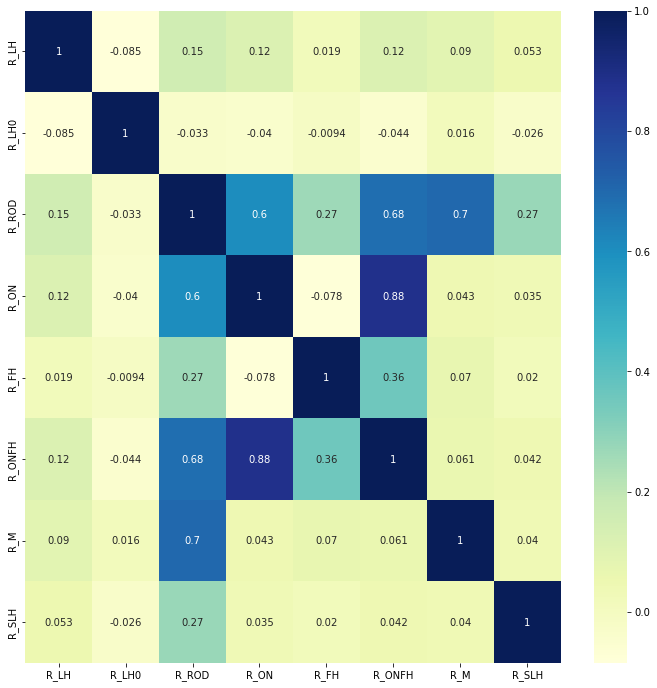

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(nscoreReturns.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [17]:
nscoreReturns.to_csv("/Users/luzhang/Documents/GitHub/WrappingUp_Exploring_Intraday_Momentum/Data/SPY_nscoreReturns.csv", index=True)

### Technical indicators calculation

In [104]:
df

,open,high,low,close,volume
time,,,,,
2007-04-23 16:14:00,148.09,148.09,148.05,148.05,16000.0
2007-04-23 16:15:00,148.06,148.12,148.06,148.11,30400.0
2007-04-23 16:16:00,148.08,148.08,148.06,148.06,126300.0
2007-04-24 09:31:00,148.23,148.28,148.12,148.15,341400.0
2007-04-24 09:32:00,148.14,148.21,148.14,148.19,449100.0
...,...,...,...,...,...
2018-11-01 22:39:00,272.92,272.92,272.92,272.92,500.0
2018-11-01 22:55:00,273.07,273.07,273.02,273.02,150.0
2018-11-01 23:44:00,272.80,272.80,272.80,272.80,3600.0


In [105]:
# find the unique date
unidate=pd.to_datetime(df.index.date).unique()
unidate

DatetimeIndex(['2007-04-23', '2007-04-24', '2007-04-25', '2007-04-26',
               '2007-04-27', '2007-04-30', '2007-05-01', '2007-05-02',
               '2007-05-03', '2007-05-04',
               ...
               '2018-10-19', '2018-10-22', '2018-10-23', '2018-10-24',
               '2018-10-25', '2018-10-26', '2018-10-29', '2018-10-30',
               '2018-10-31', '2018-11-01'],
              dtype='datetime64[ns]', length=2905, freq=None)

In [106]:
# set up the time at pre close and current close -30
T_16 = '16:00:00'
T_1530='15:30:00'
T_16=pd.to_timedelta(T_16)
T_1530=pd.to_timedelta(T_1530)

In [107]:
# prepare the start and end point 
date16=unidate+T_16
date1530=unidate+T_1530

In [108]:
date16

DatetimeIndex(['2007-04-23 16:00:00', '2007-04-24 16:00:00',
               '2007-04-25 16:00:00', '2007-04-26 16:00:00',
               '2007-04-27 16:00:00', '2007-04-30 16:00:00',
               '2007-05-01 16:00:00', '2007-05-02 16:00:00',
               '2007-05-03 16:00:00', '2007-05-04 16:00:00',
               ...
               '2018-10-19 16:00:00', '2018-10-22 16:00:00',
               '2018-10-23 16:00:00', '2018-10-24 16:00:00',
               '2018-10-25 16:00:00', '2018-10-26 16:00:00',
               '2018-10-29 16:00:00', '2018-10-30 16:00:00',
               '2018-10-31 16:00:00', '2018-11-01 16:00:00'],
              dtype='datetime64[ns]', length=2905, freq=None)

In [114]:
CustomStrategy = ta.Strategy(
    name="exploratory technical indicators",
    description="macd, rsi, adx, mom, sma, mad, bbands, aroon, obv",
    ta=[
        {"kind": "macd", "fast": 15, "slow": 30},
        {"kind": "rsi","length":30},
        {"kind": "adx","length":30},
        {"kind": "mom","length":30},
        {"kind": "sma","length": 30},
        {"kind": "mad","length":30},
        {"kind": "bbands","length": 30},
        {"kind": "aroon","length":30},
        {"kind": "obv"},
    ]
)

In [1]:
test=df[date16[0]:date1530[1]]
test.ta.strategy(CustomStrategy)
test.columns

In [2]:
# long time running
techIndicators = pd.DataFrame()
for i in range(len(unidate)-1):
    temp_df = df[date16[i]:date1530[i+1]]
    temp_df.ta.strategy(CustomStrategy)
    temp = pd.DataFrame(temp_df.mean()).T
    temp['date'] = unidate[i+1]
    techIndicators = techIndicators.append(temp)

In [117]:
techIndicators=techIndicators.set_index('date')

In [118]:
techIndicators

,open,high,low,close,volume,MACD_15_30_9,MACDh_15_30_9,MACDs_15_30_9,RSI_30,ADX_30,...,MAD_30,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,AROOND_30,AROONU_30,AROONOSC_30,OBV
date,,,,,,,,,,,,,,,,,,,,,
2007-04-24,147.931157,147.957218,147.900331,147.930992,256176.253444,0.000116,0.000946,0.001131,51.189714,13.837094,...,0.064336,147.758509,147.912205,148.065901,0.207853,0.547300,47.947948,52.252252,4.304304,5.899925e+05
2007-04-25,148.790451,148.815623,148.765650,148.792838,225709.198939,0.027391,-0.002003,0.025532,56.726826,20.999277,...,0.059630,148.646470,148.788669,148.930867,0.191217,0.663571,29.260327,60.067243,30.806916,1.997493e+06
2007-04-26,149.460637,149.481936,149.437560,149.461034,203899.267905,0.005086,-0.000327,0.004713,50.993890,15.903753,...,0.051545,149.325908,149.449765,149.573623,0.165762,0.548086,48.635927,56.829971,8.194044,2.217376e+06
2007-04-27,149.324960,149.350501,149.301240,149.326623,202164.203166,0.001508,0.001167,0.003407,51.804932,13.813264,...,0.057587,149.178706,149.317802,149.456898,0.186353,0.555993,42.129895,51.623687,9.493792,2.198766e+06
2007-04-30,149.415172,149.444324,149.393554,149.414721,202602.448276,-0.013126,0.000005,-0.012060,47.204099,19.984559,...,0.055835,149.305039,149.438348,149.571656,0.178477,0.423369,55.658021,46.416907,-9.241114,1.971142e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-26,266.050797,266.176656,265.937345,266.036047,158802.670539,-0.031953,0.000716,-0.031611,47.914602,24.090952,...,0.265414,265.373665,266.010911,266.648158,0.479403,0.480764,50.694293,46.928390,-3.765903,-3.612889e+06
2018-10-29,267.315188,267.397159,267.226074,267.311771,135054.961768,-0.023042,-0.002713,-0.021856,50.503985,19.850063,...,0.221494,266.876216,267.415489,267.954762,0.403594,0.486002,51.854606,46.604709,-5.249897,1.718357e+07
2018-10-30,264.707466,264.795635,264.616945,264.707236,141026.393152,0.023284,0.001119,0.022158,50.517536,18.748786,...,0.238743,264.117886,264.691152,265.264419,0.432793,0.506855,50.040800,51.264790,1.223990,-9.533943e+05


In [119]:
techIndicators.to_csv("../DATA/technicalIndicatorSPY.csv")

### concat returns and technical indicators

In [3]:
import pandas as pd
Returns = pd.read_csv("../DATA/SPY_Returns.csv")
Returns['datetime'] = pd.to_datetime(Returns.datetime)

In [4]:
Returns=Returns.rename(columns={'datetime':'date'})

In [6]:
# checking NAS
Returns.isnull().sum()
# No NAs 

date      0
R_LH      0
R_LH0     0
R_ROD     0
R_ON      0
R_FH      0
R_ONFH    0
R_M       0
R_SLH     0
dtype: int64

In [7]:
Indicators = pd.read_csv("../DATA/technicalIndicatorSPY.csv")

In [8]:
# checking NAS
Indicators.isnull().sum()
# No NAs 

date             0
open             0
high             0
low              0
close            0
volume           0
MACD_15_30_9     0
MACDh_15_30_9    0
MACDs_15_30_9    0
RSI_30           0
ADX_30           0
DMP_30           0
DMN_30           0
MOM_30           0
SMA_30           0
MAD_30           0
BBL_30_2.0       0
BBM_30_2.0       0
BBU_30_2.0       0
BBB_30_2.0       0
BBP_30_2.0       0
AROOND_30        0
AROONU_30        0
AROONOSC_30      0
OBV              0
dtype: int64

In [9]:
Indicators['date'] = pd.to_datetime(Indicators.date)

In [10]:
Indicators

,date,open,high,low,close,volume,MACD_15_30_9,MACDh_15_30_9,MACDs_15_30_9,RSI_30,...,MAD_30,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,AROOND_30,AROONU_30,AROONOSC_30,OBV
0,2007-04-24,147.931157,147.957218,147.900331,147.930992,256176.253444,0.000116,0.000946,0.001131,51.189714,...,0.064336,147.758509,147.912205,148.065901,0.207853,0.547300,47.947948,52.252252,4.304304,5.899925e+05
1,2007-04-25,148.790451,148.815623,148.765650,148.792838,225709.198939,0.027391,-0.002003,0.025532,56.726826,...,0.059630,148.646470,148.788669,148.930867,0.191217,0.663571,29.260327,60.067243,30.806916,1.997493e+06
2,2007-04-26,149.460637,149.481936,149.437560,149.461034,203899.267905,0.005086,-0.000327,0.004713,50.993890,...,0.051545,149.325908,149.449765,149.573623,0.165762,0.548086,48.635927,56.829971,8.194044,2.217376e+06
3,2007-04-27,149.324960,149.350501,149.301240,149.326623,202164.203166,0.001508,0.001167,0.003407,51.804932,...,0.057587,149.178706,149.317802,149.456898,0.186353,0.555993,42.129895,51.623687,9.493792,2.198766e+06
4,2007-04-30,149.415172,149.444324,149.393554,149.414721,202602.448276,-0.013126,0.000005,-0.012060,47.204099,...,0.055835,149.305039,149.438348,149.571656,0.178477,0.423369,55.658021,46.416907,-9.241114,1.971142e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,2018-10-26,266.050797,266.176656,265.937345,266.036047,158802.670539,-0.031953,0.000716,-0.031611,47.914602,...,0.265414,265.373665,266.010911,266.648158,0.479403,0.480764,50.694293,46.928390,-3.765903,-3.612889e+06
2900,2018-10-29,267.315188,267.397159,267.226074,267.311771,135054.961768,-0.023042,-0.002713,-0.021856,50.503985,...,0.221494,266.876216,267.415489,267.954762,0.403594,0.486002,51.854606,46.604709,-5.249897,1.718357e+07
2901,2018-10-30,264.707466,264.795635,264.616945,264.707236,141026.393152,0.023284,0.001119,0.022158,50.517536,...,0.238743,264.117886,264.691152,265.264419,0.432793,0.506855,50.040800,51.264790,1.223990,-9.533943e+05
2902,2018-10-31,270.294885,270.355024,270.213444,270.300433,102857.730813,0.043686,-0.000904,0.044038,54.107510,...,0.153973,269.933019,270.301757,270.670495,0.272576,0.575564,43.649664,58.303677,14.654013,-2.656188e+05


In [11]:
features = pd.merge(Returns, Indicators, on='date')

In [12]:
features

,date,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH,open,...,MAD_30,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,AROOND_30,AROONU_30,AROONOSC_30,OBV
0,2007-04-25,-0.000669,-0.000675,0.010267,0.004661,-0.001210,0.003445,0.005251,0.001540,148.790451,...,0.059630,148.646470,148.788669,148.930867,0.191217,0.663571,29.260327,60.067243,30.806916,1.997493e+06
1,2007-04-26,-0.002004,-0.000669,0.001539,0.000201,-0.001873,-0.001673,0.002882,0.000334,149.460637,...,0.051545,149.325908,149.449765,149.573623,0.165762,0.548086,48.635927,56.829971,8.194044,2.217376e+06
2,2007-04-27,-0.000134,-0.002004,0.000201,-0.002343,0.000134,-0.002209,0.003824,-0.001403,149.324960,...,0.057587,149.178706,149.317802,149.456898,0.186353,0.555993,42.129895,51.623687,9.493792,2.198766e+06
3,2007-04-30,-0.003697,-0.000134,-0.004150,0.001606,-0.002205,-0.000602,-0.002210,-0.001342,149.415172,...,0.055835,149.305039,149.438348,149.571656,0.178477,0.423369,55.658021,46.416907,-9.241114,1.971142e+06
4,2007-05-01,0.001348,-0.003697,0.001214,0.001956,-0.002020,-0.000068,0.002564,-0.001279,148.206455,...,0.075633,148.007857,148.187918,148.367978,0.243028,0.513169,46.609195,51.034483,4.425287,-9.443375e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,2018-10-26,0.000189,-0.004533,-0.018139,-0.015622,0.000075,-0.015547,-0.005528,0.002911,266.050797,...,0.265414,265.373665,266.010911,266.648158,0.479403,0.480764,50.694293,46.928390,-3.765903,-3.612889e+06
2877,2018-10-29,0.004991,0.000189,-0.010554,0.013155,0.000781,0.013947,-0.016543,-0.007749,267.315188,...,0.221494,266.876216,267.415489,267.954762,0.403594,0.486002,51.854606,46.604709,-5.249897,1.718357e+07
2878,2018-10-30,0.002639,0.004991,0.012528,-0.000493,0.012250,0.011751,-0.002286,0.003061,264.707466,...,0.238743,264.117886,264.691152,265.264419,0.432793,0.506855,50.040800,51.264790,1.223990,-9.533943e+05
2879,2018-10-31,-0.006350,0.002639,0.017214,0.010605,0.003362,0.014002,0.004806,-0.001631,270.294885,...,0.153973,269.933019,270.301757,270.670495,0.272576,0.575564,43.649664,58.303677,14.654013,-2.656188e+05


In [13]:
#features.to_csv("../DATA/featuresSPY.csv")

In [29]:
# uscore features on R
# import u-scored features
uscoreFeatures = pd.read_csv("../DATA/uscoredFeaturesSPY.csv")

In [30]:
uscoreFeatures

,date,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH,open,...,MAD_30,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,AROOND_30,AROONU_30,AROONOSC_30,OBV
0,4/25/07,0.339639,0.337556,0.881812,0.825234,0.299028,0.748178,0.839813,0.832523,0.460778,...,0.325061,0.461125,0.460778,0.460430,0.423638,0.998091,0.000174,0.935960,0.997050,0.481604
1,4/26/07,0.164006,0.339639,0.561784,0.475356,0.220236,0.333044,0.707914,0.588511,0.465637,...,0.186914,0.465984,0.465637,0.463901,0.301111,0.788094,0.409059,0.826623,0.741236,0.498612
2,4/27/07,0.453141,0.163658,0.476744,0.262582,0.524991,0.290351,0.779417,0.178931,0.463207,...,0.289309,0.464249,0.463207,0.463207,0.401770,0.829400,0.078619,0.511107,0.782194,0.495141
3,4/30/07,0.078619,0.453141,0.245574,0.614544,0.186220,0.425373,0.286185,0.185526,0.464943,...,0.257029,0.465637,0.465290,0.463554,0.364977,0.057792,0.859597,0.179625,0.142832,0.479174
4,5/1/07,0.777681,0.078271,0.537487,0.647518,0.204616,0.476050,0.684658,0.194551,0.457654,...,0.559701,0.458001,0.457654,0.457654,0.594759,0.544429,0.270566,0.469108,0.598230,0.028636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,10/26/18,0.531239,0.056404,0.048421,0.022041,0.514578,0.024818,0.152551,0.929365,0.932142,...,0.993232,0.931100,0.932142,0.932489,0.907844,0.302152,0.564561,0.200798,0.300069,0.124436
2877,10/29/18,0.958521,0.531239,0.108469,0.977265,0.636064,0.973794,0.018570,0.011628,0.937001,...,0.982818,0.936307,0.937695,0.939084,0.861333,0.340680,0.646130,0.187608,0.250087,0.980389
2878,10/30/18,0.894655,0.958174,0.912704,0.416001,0.994273,0.959910,0.282714,0.936654,0.927629,...,0.986289,0.927629,0.927629,0.928671,0.882853,0.494446,0.516661,0.487504,0.476744,0.258417
2879,10/31/18,0.030371,0.894308,0.954009,0.957827,0.908192,0.974488,0.821416,0.154287,0.944290,...,0.945331,0.944290,0.944290,0.944637,0.666262,0.907150,0.129642,0.886324,0.893613,0.304582


In [31]:
# normalize uscored features
from scipy.stats import norm
tempFeatures = uscoreFeatures.drop('date',axis=1)
nscoreFeatures = norm.ppf(tempFeatures) # normalized the u-scored returns

In [33]:
nscoreFeatures = pd.DataFrame(nscoreFeatures, columns = uscoreFeatures.columns[1:33])
nscoreFeatures

,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH,open,high,...,MAD_30,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,AROOND_30,AROONU_30,AROONOSC_30,OBV
0,-0.413449,-0.419141,1.184093,0.935499,-0.527198,0.668766,0.993688,0.964185,-0.098475,-0.098475,...,-0.453593,-0.097601,-0.098475,-0.099349,-0.192596,2.892810,-3.577345,1.521715,2.753247,-0.046129
1,-0.978128,-0.413449,0.155494,-0.061813,-0.771396,-0.431523,0.547301,0.223716,-0.086242,-0.087116,...,-0.889325,-0.085369,-0.086242,-0.090610,-0.521209,0.799827,-0.229965,0.940903,0.647160,-0.003480
2,-0.117729,-0.979533,-0.058327,-0.635404,0.062685,-0.552361,0.770225,-0.919447,-0.092357,-0.092357,...,-0.555404,-0.089736,-0.092357,-0.092357,-0.248768,0.951795,-1.414425,0.027845,0.779623,-0.012181
3,-1.414425,-0.117729,-0.688483,0.291181,-0.891912,-0.188166,-0.564563,-0.894505,-0.087989,-0.089736,...,-0.652533,-0.086242,-0.087116,-0.091483,-0.345186,-1.573579,1.078512,-0.916795,-1.067680,-0.052227
4,0.764386,-1.416795,0.094105,0.378629,-0.825244,-0.060070,0.480765,-0.861249,-0.106347,-0.106347,...,0.150212,-0.105472,-0.106347,-0.106347,0.239804,0.111598,-0.611103,-0.077512,0.248768,-1.901231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,0.078385,-1.585697,-1.660363,-2.013311,0.036550,-1.963091,-1.025553,1.471077,1.491933,1.491933,...,2.469321,1.484036,1.491933,1.494586,1.327598,-0.518221,0.162543,-0.838773,-0.524201,-1.153094
2877,1.733779,0.078385,-1.234710,2.000277,0.347957,1.939731,-2.084223,-2.269206,1.530076,1.532887,...,2.115785,1.524490,1.535710,1.547127,1.086327,-0.410607,0.374893,-0.886744,-0.674217,2.061845
2878,1.251668,1.729881,1.357595,-0.212134,2.528523,1.749640,-0.574797,1.527277,1.458360,1.458360,...,2.205471,1.458360,1.458360,1.465961,1.189371,-0.013921,0.041775,-0.031327,-0.058327,-0.648233
2879,-1.875363,1.249766,1.685034,1.726009,1.329701,1.951278,0.920775,-1.018220,1.591845,1.591845,...,1.601180,1.591845,1.591845,1.594941,0.429614,1.323409,-1.128083,1.207209,1.245976,-0.511268


In [34]:
# add date back 
nscoreFeatures['date'] = uscoreFeatures['date']
nscoreFeatures

,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH,open,high,...,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,AROOND_30,AROONU_30,AROONOSC_30,OBV,date
0,-0.413449,-0.419141,1.184093,0.935499,-0.527198,0.668766,0.993688,0.964185,-0.098475,-0.098475,...,-0.097601,-0.098475,-0.099349,-0.192596,2.892810,-3.577345,1.521715,2.753247,-0.046129,4/25/07
1,-0.978128,-0.413449,0.155494,-0.061813,-0.771396,-0.431523,0.547301,0.223716,-0.086242,-0.087116,...,-0.085369,-0.086242,-0.090610,-0.521209,0.799827,-0.229965,0.940903,0.647160,-0.003480,4/26/07
2,-0.117729,-0.979533,-0.058327,-0.635404,0.062685,-0.552361,0.770225,-0.919447,-0.092357,-0.092357,...,-0.089736,-0.092357,-0.092357,-0.248768,0.951795,-1.414425,0.027845,0.779623,-0.012181,4/27/07
3,-1.414425,-0.117729,-0.688483,0.291181,-0.891912,-0.188166,-0.564563,-0.894505,-0.087989,-0.089736,...,-0.086242,-0.087116,-0.091483,-0.345186,-1.573579,1.078512,-0.916795,-1.067680,-0.052227,4/30/07
4,0.764386,-1.416795,0.094105,0.378629,-0.825244,-0.060070,0.480765,-0.861249,-0.106347,-0.106347,...,-0.105472,-0.106347,-0.106347,0.239804,0.111598,-0.611103,-0.077512,0.248768,-1.901231,5/1/07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,0.078385,-1.585697,-1.660363,-2.013311,0.036550,-1.963091,-1.025553,1.471077,1.491933,1.491933,...,1.484036,1.491933,1.494586,1.327598,-0.518221,0.162543,-0.838773,-0.524201,-1.153094,10/26/18
2877,1.733779,0.078385,-1.234710,2.000277,0.347957,1.939731,-2.084223,-2.269206,1.530076,1.532887,...,1.524490,1.535710,1.547127,1.086327,-0.410607,0.374893,-0.886744,-0.674217,2.061845,10/29/18
2878,1.251668,1.729881,1.357595,-0.212134,2.528523,1.749640,-0.574797,1.527277,1.458360,1.458360,...,1.458360,1.458360,1.465961,1.189371,-0.013921,0.041775,-0.031327,-0.058327,-0.648233,10/30/18
2879,-1.875363,1.249766,1.685034,1.726009,1.329701,1.951278,0.920775,-1.018220,1.591845,1.591845,...,1.591845,1.591845,1.594941,0.429614,1.323409,-1.128083,1.207209,1.245976,-0.511268,10/31/18


In [36]:
nscoreFeatures.to_csv("../DATA/nscoredFeaturesSPY.csv")

### FULL SAMPLE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import scipy.special

In [38]:
nscoreFeatures = pd.read_csv("../DATA/nscoredFeaturesSPY.csv")
nscoreFeatures = pd.DataFrame(nscoreFeatures)
nscoreFeatures

,date,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH,open,...,MAD_30,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,AROOND_30,AROONU_30,AROONOSC_30,OBV
0,4/25/07,-0.413449,-0.419141,1.184093,0.935499,-0.527198,0.668766,0.993688,0.964185,-0.098475,...,-0.453593,-0.097601,-0.098475,-0.099349,-0.192596,2.892810,-3.577345,1.521715,2.753247,-0.046129
1,4/26/07,-0.978128,-0.413449,0.155494,-0.061813,-0.771396,-0.431523,0.547301,0.223716,-0.086242,...,-0.889325,-0.085369,-0.086242,-0.090610,-0.521209,0.799827,-0.229965,0.940903,0.647160,-0.003480
2,4/27/07,-0.117729,-0.979533,-0.058327,-0.635404,0.062685,-0.552361,0.770225,-0.919447,-0.092357,...,-0.555404,-0.089736,-0.092357,-0.092357,-0.248768,0.951795,-1.414425,0.027845,0.779623,-0.012181
3,4/30/07,-1.414425,-0.117729,-0.688483,0.291181,-0.891912,-0.188166,-0.564563,-0.894505,-0.087989,...,-0.652533,-0.086242,-0.087116,-0.091483,-0.345186,-1.573579,1.078512,-0.916795,-1.067680,-0.052227
4,5/1/07,0.764386,-1.416795,0.094105,0.378629,-0.825244,-0.060070,0.480765,-0.861249,-0.106347,...,0.150212,-0.105472,-0.106347,-0.106347,0.239804,0.111598,-0.611103,-0.077512,0.248768,-1.901231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,10/26/18,0.078385,-1.585697,-1.660363,-2.013311,0.036550,-1.963091,-1.025553,1.471077,1.491933,...,2.469321,1.484036,1.491933,1.494586,1.327598,-0.518221,0.162543,-0.838773,-0.524201,-1.153094
2877,10/29/18,1.733779,0.078385,-1.234710,2.000277,0.347957,1.939731,-2.084223,-2.269206,1.530076,...,2.115785,1.524490,1.535710,1.547127,1.086327,-0.410607,0.374893,-0.886744,-0.674217,2.061845
2878,10/30/18,1.251668,1.729881,1.357595,-0.212134,2.528523,1.749640,-0.574797,1.527277,1.458360,...,2.205471,1.458360,1.458360,1.465961,1.189371,-0.013921,0.041775,-0.031327,-0.058327,-0.648233
2879,10/31/18,-1.875363,1.249766,1.685034,1.726009,1.329701,1.951278,0.920775,-1.018220,1.591845,...,1.601180,1.591845,1.591845,1.594941,0.429614,1.323409,-1.128083,1.207209,1.245976,-0.511268


In [39]:
y = nscoreFeatures['R_LH']

In [40]:
X = nscoreFeatures[['MACD_15_30_9','MACDs_15_30_9','RSI_30','DMP_30','MOM_30','BBP_30_2.0',
                    'AROOND_30','OBV','R_LH0','R_ON','R_M','R_ROD']]
poly = PolynomialFeatures(interaction_only=True)
X_tr = poly.fit_transform(X)
Xt = pd.DataFrame(X_tr, columns=poly.get_feature_names(input_features=['MACD_15_30_9','MACDs_15_30_9','RSI_30','DMP_30','MOM_30','BBP_30_2.0',
                    'AROOND_30','OBV','R_LH0','R_ON','R_M','R_ROD']))

In [41]:
lr_full = sm.OLS(y, Xt).fit()

In [42]:
lr_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   R_LH   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     3.799
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           1.98e-25
Time:                        18:13:09   Log-Likelihood:                -3942.5
No. Observations:                2881   AIC:                             8043.
Df Residuals:                    2802   BIC:                             8514.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
1                              0.0039      0.028      0.140      0.889      -0.050       0.058
MACD_15_30_9                   1.0669      0.605      1.763      0.078      -0.120       2.254
MACDs_15_30_9                 -0.2108      0.598     -0.353      0.724      -1.383       0.962
RSI_30                        -0.1267      0.075     -1.691      0.091      -0.274       0.020
DMP_30                        -0.0112      0.022     -0.514      0.607      -0.054       0.032
MOM_30                        -0.9434      0.306     -3.083      0.002      -1.543      -0.343
BBP_30_2.0                     0.0453      0.064      0.710      0.478      -0.080       0.171
AROOND_30                      0.0230      0.041      0.561      0.575      -0.057       0.104
OBV                            0.0383      0.020      1.889      0.059      -0.001       0.078
R_LH0                         -0.0666      0.020     -3.372      0.001      -0.105      -0.028
R_ON                           0.0649      0.036      1.806      0.071      -0.006       0.135
R_M                            0.0218      0.039      0.562      0.574      -0.054       0.098
R_ROD                          0.2449      0.078      3.127      0.002       0.091       0.398
MACD_15_30_9 MACDs_15_30_9    -1.1241      0.662     -1.698      0.090      -2.422       0.174
MACD_15_30_9 RSI_30           -1.0124      1.718     -0.589      0.556      -4.381       2.357
MACD_15_30_9 DMP_30           -0.1133      0.468     -0.242      0.809      -1.032       0.805
MACD_15_30_9 MOM_30            4.8950      1.663      2.943      0.003       1.634       8.156
MACD_15_30_9 BBP_30_2.0        1.6767      1.589      1.055      0.291      -1.439       4.792
MACD_15_30_9 AROOND_30         3.4893      1.002      3.483      0.001       1.525       5.453
MACD_15_30_9 OBV               1.3847      0.554      2.501      0.012       0.299       2.470
MACD_15_30_9 R_LH0            -0.1510      0.419     -0.361      0.718      -0.972       0.670
MACD_15_30_9 R_ON              2.4897      0.831      2.994      0.003       0.859       4.120
MACD_15_30_9 R_M               1.3047      0.900      1.450      0.147      -0.460       3.069
MACD_15_30_9 R_ROD            -5.5075      1.315     -4.190      0.000      -8.085      -2.930
MACDs_15_30_9 RSI_30           1.0679      1.934      0.552      0.581      -2.725       4.860
MACDs_15_30_9 DMP_30           0.2101      0.525      0.400      0.689      -0.819       1.239
MACDs_15_30_9 MOM_30          -4.0000      1.526     -2.621      0.009      -6.993      -1.007
MACDs_15_30_9 BBP_30_2.0      -0.6211      1.707     -0.364      0.716      -3.968       2.726
MACDs_15_30_9 AROOND_30       -2.9149      1.144     -2.549      0.011      -5.157      -0.672
MACDs_15_30_9 OBV             -0.8184      

### SUB SAMPLE

In [2]:
nscoreFeatures = pd.read_csv("../DATA/nscoredFeaturesWithCombinationSPY.csv")

In [3]:
nscoreFeatures

,date,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH,open,...,BBP_30_2.0,AROOND_30,AROONU_30,AROONOSC_30,OBV,combination_LH0_ON,combination_LH0_RM,combination_LH0_ROD,combination_ON_ROD,combination_ON_RM
0,4/25/07,-0.413449,-0.419141,1.184093,0.935499,-0.527198,0.668766,0.993688,0.964185,-0.098475,...,2.892810,-3.577345,1.521715,2.753247,-0.046129,2.0,2.0,2.0,0.0,0.0
1,4/26/07,-0.978128,-0.413449,0.155494,-0.061813,-0.771396,-0.431523,0.547301,0.223716,-0.086242,...,0.799827,-0.229965,0.940903,0.647160,-0.003480,3.0,2.0,2.0,2.0,2.0
2,4/27/07,-0.117729,-0.979533,-0.058327,-0.635404,0.062685,-0.552361,0.770225,-0.919447,-0.092357,...,0.951795,-1.414425,0.027845,0.779623,-0.012181,3.0,2.0,3.0,3.0,2.0
3,4/30/07,-1.414425,-0.117729,-0.688483,0.291181,-0.891912,-0.188166,-0.564563,-0.894505,-0.087989,...,-1.573579,1.078512,-0.916795,-1.067680,-0.052227,2.0,3.0,3.0,1.0,1.0
4,5/1/07,0.764386,-1.416795,0.094105,0.378629,-0.825244,-0.060070,0.480765,-0.861249,-0.106347,...,0.111598,-0.611103,-0.077512,0.248768,-1.901231,2.0,2.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,10/26/18,0.078385,-1.585697,-1.660363,-2.013311,0.036550,-1.963091,-1.025553,1.471077,1.491933,...,-0.518221,0.162543,-0.838773,-0.524201,-1.153094,3.0,3.0,3.0,3.0,3.0
2877,10/29/18,1.733779,0.078385,-1.234710,2.000277,0.347957,1.939731,-2.084223,-2.269206,1.530076,...,-0.410607,0.374893,-0.886744,-0.674217,2.061845,0.0,1.0,1.0,1.0,1.0
2878,10/30/18,1.251668,1.729881,1.357595,-0.212134,2.528523,1.749640,-0.574797,1.527277,1.458360,...,-0.013921,0.041775,-0.031327,-0.058327,-0.648233,1.0,1.0,0.0,2.0,3.0
2879,10/31/18,-1.875363,1.249766,1.685034,1.726009,1.329701,1.951278,0.920775,-1.018220,1.591845,...,1.323409,-1.128083,1.207209,1.245976,-0.511268,0.0,0.0,0.0,0.0,0.0


In [4]:
lr_squares = np.zeros(4)
lr_squares_adj = np.zeros(4)
def rsquares(dataframe,directions):
    PP = directions == 0 
    PN = directions == 1 
    NP = directions == 2 
    NN = directions == 3
    sub_PP = dataframe[PP]
    sub_PN = dataframe[PN]
    sub_NP = dataframe[NP]
    sub_NN = dataframe[NN] 
    sublist = [sub_PP,sub_PN,sub_NP,sub_NN]
    lr_squares = np.zeros(4)

    for j in range(4):
        X = sublist[j][['MACD_15_30_9','MACDs_15_30_9','RSI_30','DMP_30','MOM_30','BBP_30_2.0',
                    'AROOND_30','OBV','R_LH0','R_ON','R_M','R_ROD']]
        y = sublist[j]['R_LH']
        poly = PolynomialFeatures(interaction_only=True)
        X_tr = poly.fit_transform(X)
        Xt = pd.DataFrame(X_tr, columns=poly.get_feature_names(input_features=['MACD_15_30_9','MACDs_15_30_9','RSI_30','DMP_30','MOM_30','BBP_30_2.0',
                    'AROOND_30','OBV','R_LH0','R_ON','R_M','R_ROD']))
        lr = sm.OLS(list(y), Xt).fit()
        lr_squares[j] = lr.rsquared
        lr_squares_adj[j] = lr.rsquared_adj
    return print([{'rsqures':lr_squares },
                  {'rsquare_adj': lr_squares_adj}])

#### Pair of R_LH0 and R_ON

In [5]:
rsquares(nscoreFeatures,nscoreFeatures['combination_LH0_ON'])

[{'rsqures': array([0.23536112, 0.23366623, 0.22870589, 0.16869698])}, {'rsquare_adj': array([0.13947393, 0.14309952, 0.13755295, 0.0642821 ])}]


#### Pair of R_LH0 and R_M

In [6]:
rsquares(nscoreFeatures,nscoreFeatures['combination_LH0_RM'])

[{'rsqures': array([0.26567543, 0.19658664, 0.2056147 , 0.21882798])}, {'rsquare_adj': array([0.17701085, 0.09805481, 0.10819009, 0.12436067])}]


#### Pair of R_LH0 and R_ROD

In [7]:
rsquares(nscoreFeatures,nscoreFeatures['combination_LH0_ROD'])

[{'rsqures': array([0.25833585, 0.21487363, 0.24489659, 0.20615567])}, {'rsquare_adj': array([0.16532974, 0.12194516, 0.1556571 , 0.10660606])}]


#### Pair of R_ON and R_ROD

In [8]:
rsquares(nscoreFeatures,nscoreFeatures['combination_ON_ROD'])

[{'rsqures': array([0.2088753 , 0.31278533, 0.36413034, 0.1762683 ])}, {'rsquare_adj': array([0.14439492, 0.14734477, 0.21152162, 0.1091303 ])}]


#### Pair of ON and R_M

In [9]:
rsquares(nscoreFeatures,nscoreFeatures['combination_ON_RM'])

[{'rsqures': array([0.24865817, 0.27591875, 0.2161636 , 0.21732455])}, {'rsquare_adj': array([0.1591854 , 0.18584165, 0.11865285, 0.12397794])}]
